$\textbf{PROGRAMMING ASSIGNMENT}$
---
# Logistic Regression Project Exercise 

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### Exploratory Data Analysis and Visualization
---
- Perform EDA and explain each graph

### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0  
1        2  3.0   3.0    2  


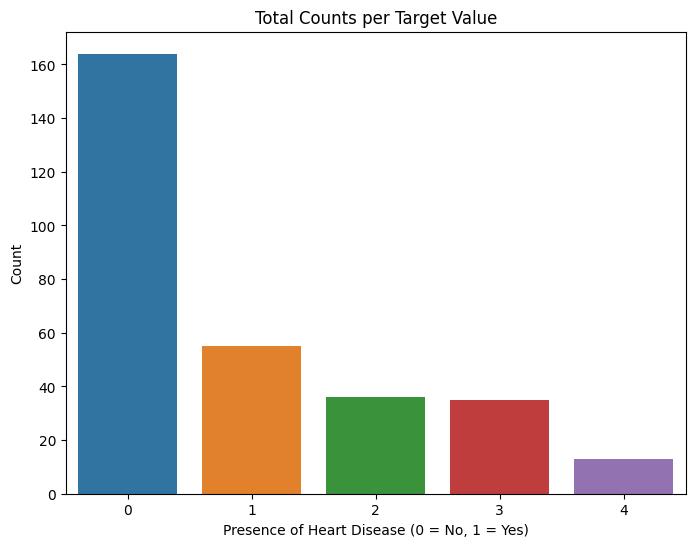

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display the resulting DataFrame
print(df)

# Create a bar plot showing the total counts per target value
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=df)
plt.title('Total Counts per Target Value')
plt.xlabel('Presence of Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
df.head()

**TASK: Create a pairplot that displays the relationships between the following columns:**

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

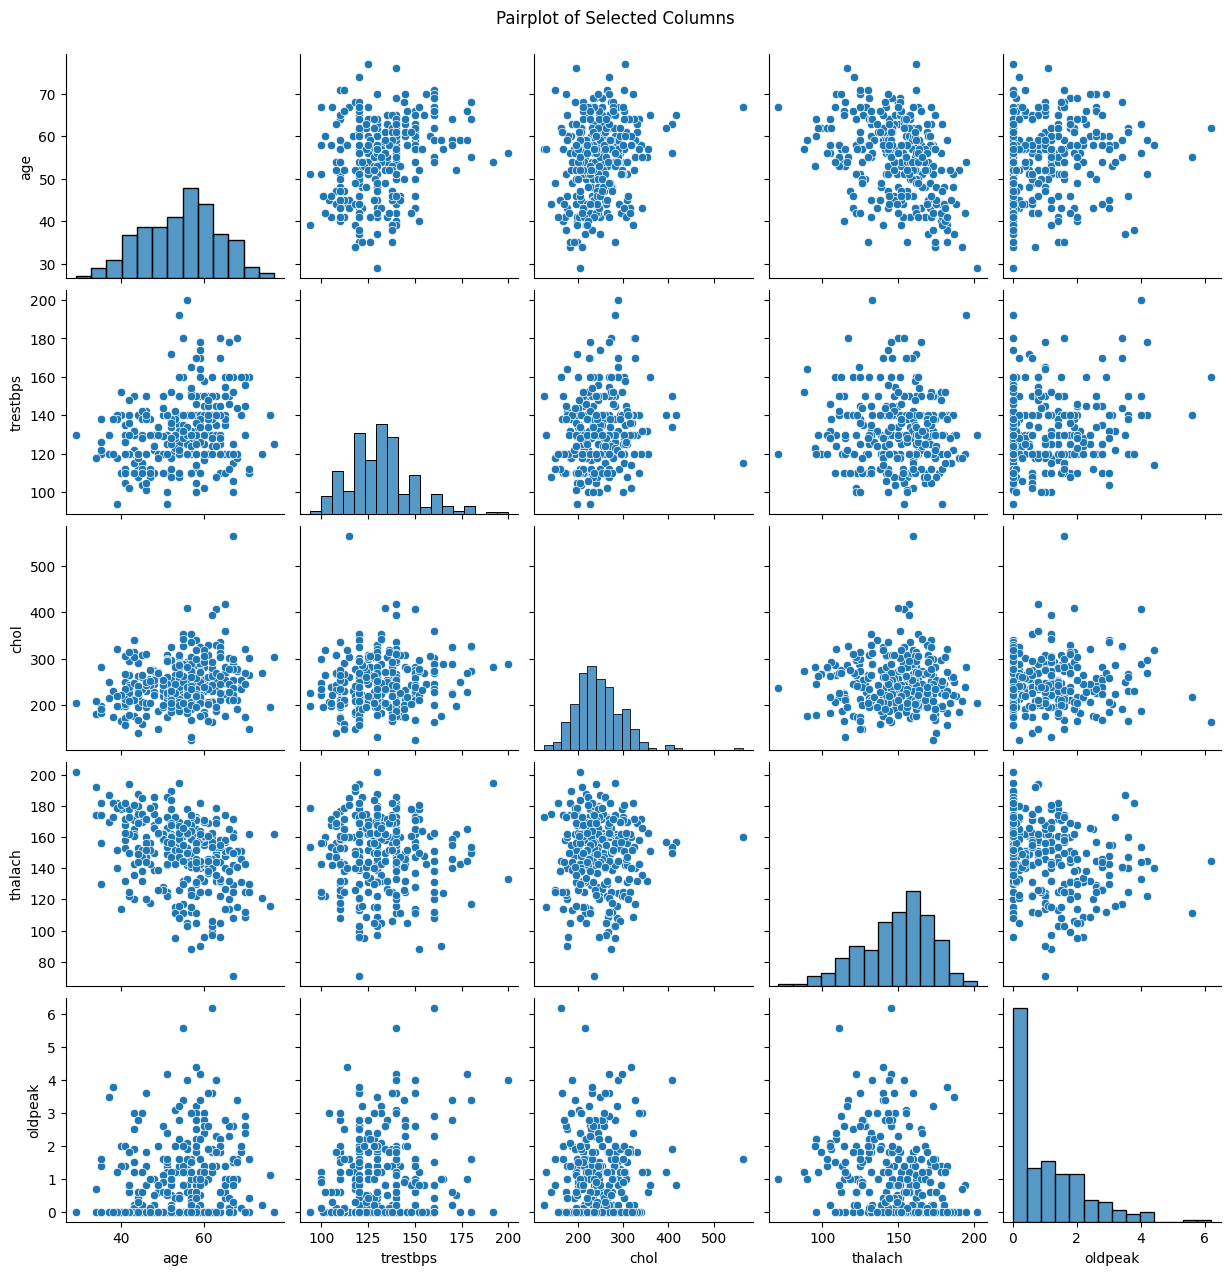

In [2]:
#! NOTE: instruction was concatenated so I decided to use the age, trestbps, chol, thalach, and oldpeak columns
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for pairplot
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a pairplot
sns.pairplot(df[selected_columns])
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()

**TASK: Create a heatmap that displays the correlation between all the columns.**

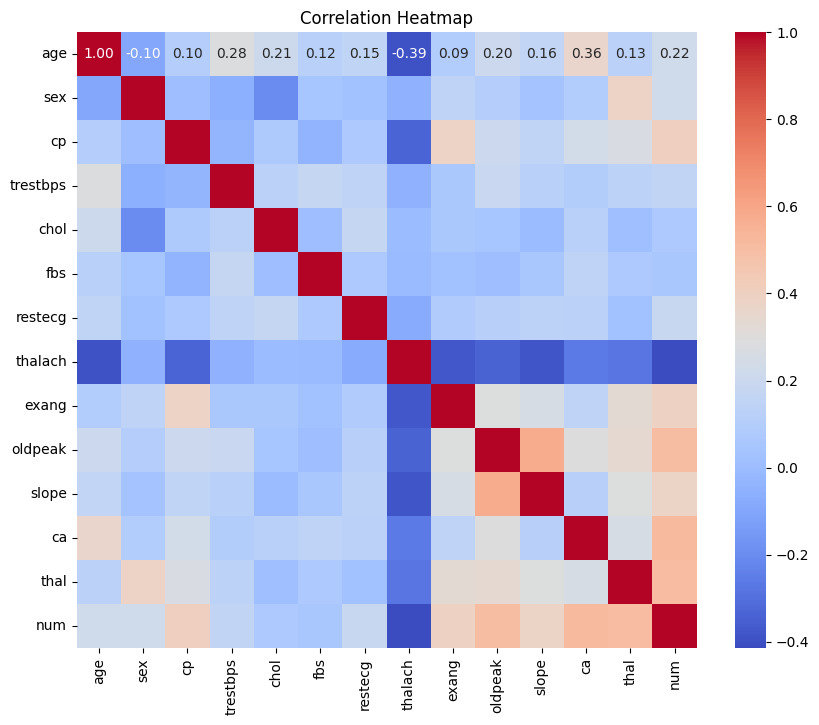

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Modeling Task

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [4]:
# Separate features (X) and labels (y)
y = df['num']
X = df.drop(columns=['num'])

**TASK: Perform a train test split on the data, with the test size of 5% and a random_state of 0.**

In [5]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data.**

In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create StandardScaler object
scaler = StandardScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Find rows with NaN values in X_train_scaled
nan_indices = np.isnan(X_train_scaled).any(axis=1)

# Filter out rows with NaN values
X_train_scaled_clean = X_train_scaled[~nan_indices]
y_train_clean = y_train[~nan_indices]


[[ 0.61844464 -1.46759877  0.88990665 ...  0.64957714  1.39567785
   1.15177257]
 [ 1.28655108  0.68138514  0.88990665 ...  0.64957714 -0.71649772
  -0.90948446]
 [-0.4950661  -1.46759877 -1.17813553 ... -0.95756629 -0.71649772
  -0.90948446]
 ...
 [-2.16533221 -1.46759877  0.88990665 ... -0.95756629 -0.71649772
  -0.90948446]
 [-0.4950661   0.68138514  0.88990665 ...  0.64957714 -0.71649772
   1.15177257]
 [ 0.50709357 -1.46759877  0.88990665 ...  0.64957714 -0.71649772
  -0.90948446]]


## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [14]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with strategy='mean' (you can use other strategies as well)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train_scaled)

# Create LogisticRegressionCV model
lr_cv = LogisticRegressionCV(Cs=10, cv=5, random_state=0, max_iter=1000)

# Fit the model on the training data
lr_cv.fit(X_train_scaled_clean, y_train_clean)

# Get the selected regularization parameter (C value)
best_C = lr_cv.C_[0]
print("Best C value:", best_C)

Best C value: 0.3593813663804626


**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [15]:
# Get the selected regularization parameter (C value)
best_C = lr_cv.C_[0]
print("Optimal C value:", best_C)

Optimal C value: 0.3593813663804626


### Coeffecients

**TASK: Report back the model's coefficients.**

In [16]:
# Get the coefficients of the logistic regression model
coefficients = lr_cv.coef_

# Print the coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, coefficients[0]):
    print(f"{feature}: {coef}")

Model Coefficients:
age: 0.009886732703035066
sex: -0.3007720916247121
cp: -0.46743623044847044
trestbps: -0.29817914128471373
chol: -0.25807527888772686
fbs: 0.23817537420178767
restecg: -0.15021197586806795
thalach: 0.2741278841651454
exang: -0.32961213869136213
oldpeak: -0.4069223239362738
slope: -0.35312729196352033
ca: -0.983325022926536
thal: -0.6988158410862124


**Task: Create a visualization of the coefficients.**

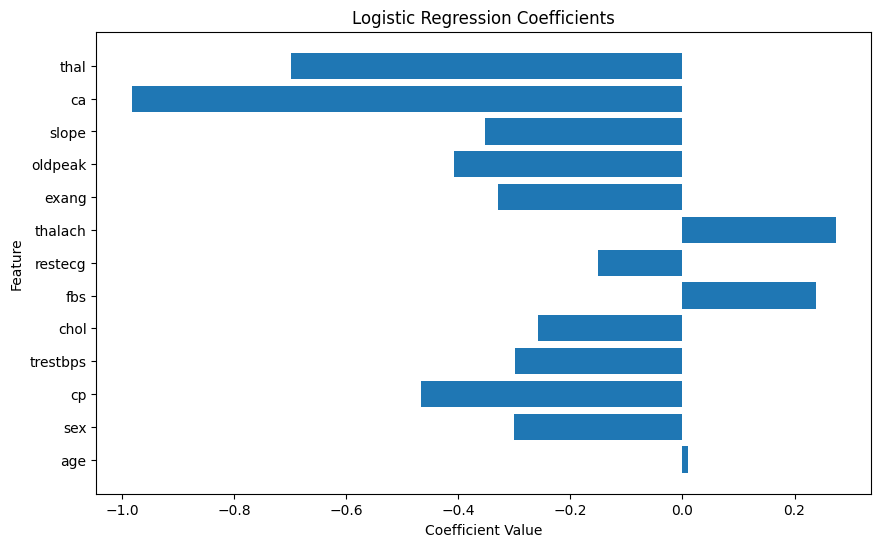

In [17]:
import matplotlib.pyplot as plt

# Get the coefficients of the logistic regression model
coefficients = lr_cv.coef_[0]

# Get the feature names
feature_names = X.columns

# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

---------

## Model Performance Evaluation

**TASK: Evaluate your model on the remaining 5% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test data
test_score = lr_cv.score(X_test_scaled, y_test)
print("Accuracy on test data:", test_score)

# Generate predictions on the test data
y_pred = lr_cv.predict(X_test_scaled)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix Array:")
print(conf_matrix)

Accuracy on test data: 0.375

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.50      0.25      0.33         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

    accuracy                           0.38        16
   macro avg       0.26      0.24      0.24        16
weighted avg       0.37      0.38      0.36        16


Confusion Matrix:
[[5 0 2 0]
 [2 1 1 0]
 [2 0 0 1]
 [0 1 1 0]]


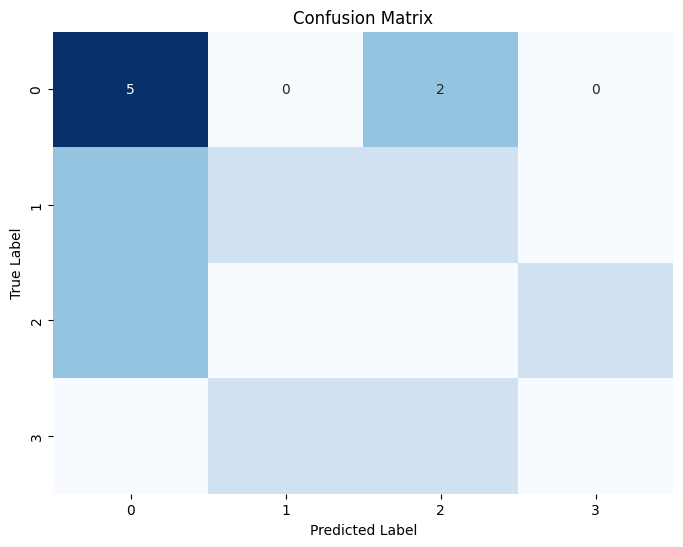

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.50      0.25      0.33         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

    accuracy                           0.38        16
   macro avg       0.26      0.24      0.24        16
weighted avg       0.37      0.38      0.36        16



In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions on the test data
y_pred = lr_cv.predict(X_test_scaled)

# Generate a confusion matrix array
conf_matrix_array = confusion_matrix(y_test, y_pred)

# Generate a confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_array, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Plot')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

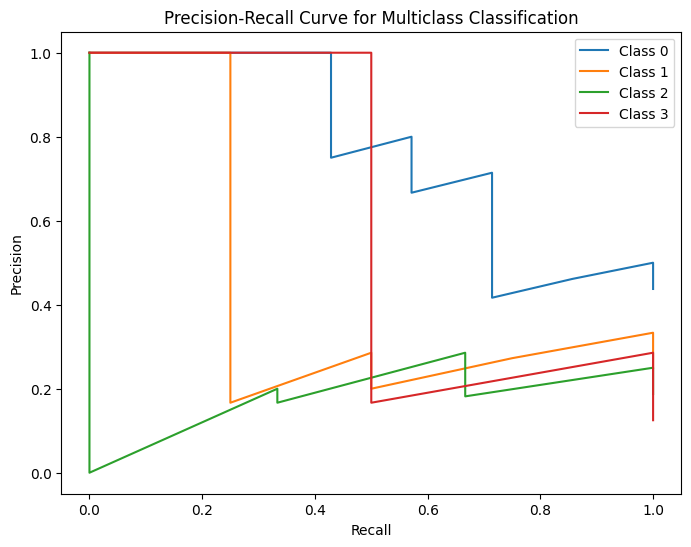

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarize the labels
classes=[0, 1, 2, 3]
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate precision and recall for each class
precision = dict()
recall = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], lr_cv.predict_proba(X_test_scaled)[:, i])

# Plot Precision-Recall curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(recall[i], precision[i], label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification')
plt.legend(loc='best')
plt.show()